# Purpose

The purpose of this project is to conduct data analysis.  The data being explored is a Uber dataset where data related to the reason of the Uber service will be explored.  The purpose of customers using Uber will be the primary focus of the analysis.<br>

**What to expect:**<br>
Loading data<br>
Transforming data<br>
Exploring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import calendar
import itertools

**Load data**

In [2]:
df = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\datasets\\Uber Drives - .csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Asses the data cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
col = df.columns
col

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [6]:
for i in col:
    if len(df[i].unique()) < 20:
        print('The unique values in column**',i,'** are',df[i].unique())
        print('The number of unique values in column **',i,'** are',len(df[i].unique()))
        print('-------------------------------------------------------------------------')
    else:
        print('The number of unique values in column **',i,'** are',len(df[i].unique()))
        print('-------------------------------------------------------------------------')

The number of unique values in column ** START_DATE* ** are 1155
-------------------------------------------------------------------------
The number of unique values in column ** END_DATE* ** are 1155
-------------------------------------------------------------------------
The unique values in column** CATEGORY* ** are ['Business' 'Personal' nan]
The number of unique values in column ** CATEGORY* ** are 3
-------------------------------------------------------------------------
The number of unique values in column ** START* ** are 178
-------------------------------------------------------------------------
The number of unique values in column ** STOP* ** are 189
-------------------------------------------------------------------------
The number of unique values in column ** MILES* ** are 257
-------------------------------------------------------------------------
The unique values in column** PURPOSE* ** are ['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Te

In [7]:
# There are nan values in column CATEGORY* and PURPOSE*.  need to double check other columns as well

In [8]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

**If you needed to keep the NaN values then the following would have been performed**

In [9]:
# Since column CATEGORY* and PURPOSE* are string columns with NaN values, we need to ensure they are converted to .dtype(str)
# for string manipulation

In [10]:
df['CATEGORY*'] = df['CATEGORY*'].astype(str)
df['PURPOSE*'] = df['PURPOSE*'].astype(str)

In [11]:
# You can see since converting those columns to str values, it removed the NaN values.  

In [12]:
df.isna().sum()

START_DATE*    0
END_DATE*      1
CATEGORY*      0
START*         1
STOP*          1
MILES*         0
PURPOSE*       0
dtype: int64

**However, we will be dropping the NaN values because we would like to understand the reasons behind using Uber servives**

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


**Need to change the date columns to the correct format**

In [16]:
df.head(1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain


In [17]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format= '%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['START_DATE*'], format= '%m/%d/%Y %H:%M')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


**Extracting day and month**

In [19]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in df['START_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek)
    month.append(i.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

df['start_hour'] = hour
df['start_day'] = day
df['start_DoW'] = dayofweek
df['start_month'] = month
df['start_weekday'] = weekday

In [20]:
df.head(1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,start_hour,start_day,start_DoW,start_month,start_weekday
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday


In [21]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in df['END_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek)
    month.append(i.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

df['end_hour'] = hour
df['end_day'] = day
df['end_DoW'] = dayofweek
df['end_month'] = month
df['end_weekday'] = weekday

In [22]:
df.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,start_hour,start_day,start_DoW,start_month,start_weekday,end_hour,end_day,end_DoW,end_month,end_weekday
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,nan,1,2,5,1,Saturday,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,14,6,2,1,Wednesday


# EDA

In [23]:
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

[Text(0, 0, '1078'), Text(0, 0, '77')]

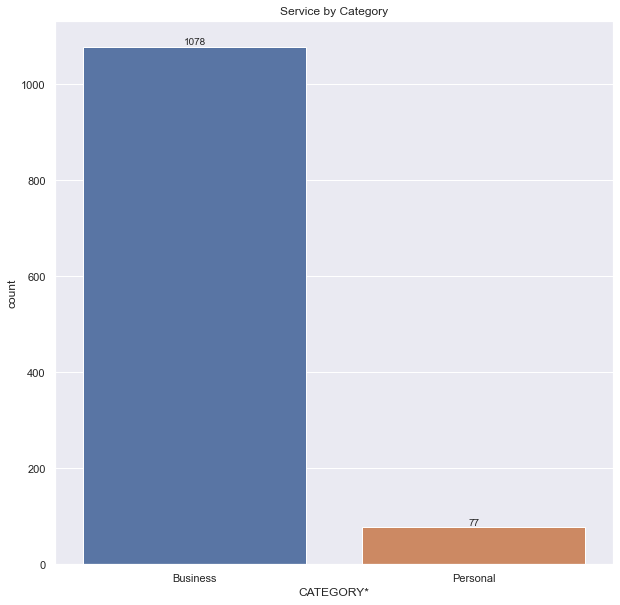

In [24]:
plt.figure(figsize=(10,10))
plt.title('Service by Category')
ax = sns.countplot(data=df,x='CATEGORY*')
ax.bar_label(ax.containers[0])

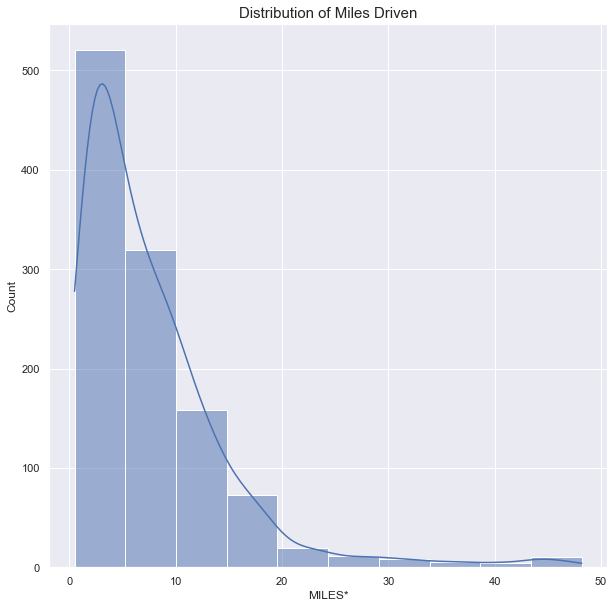

In [25]:
plt.figure(figsize=(10,10))
plt.title('Distribution of Miles Driven', fontsize=15)
ax=sns.histplot(data=df[df['MILES*']<50], x='MILES*', kde=True,bins=10)

In [26]:
df['MILES*'].value_counts()

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: MILES*, Length: 256, dtype: int64

Text(0.5, 1.0, 'Most Popular Distances')

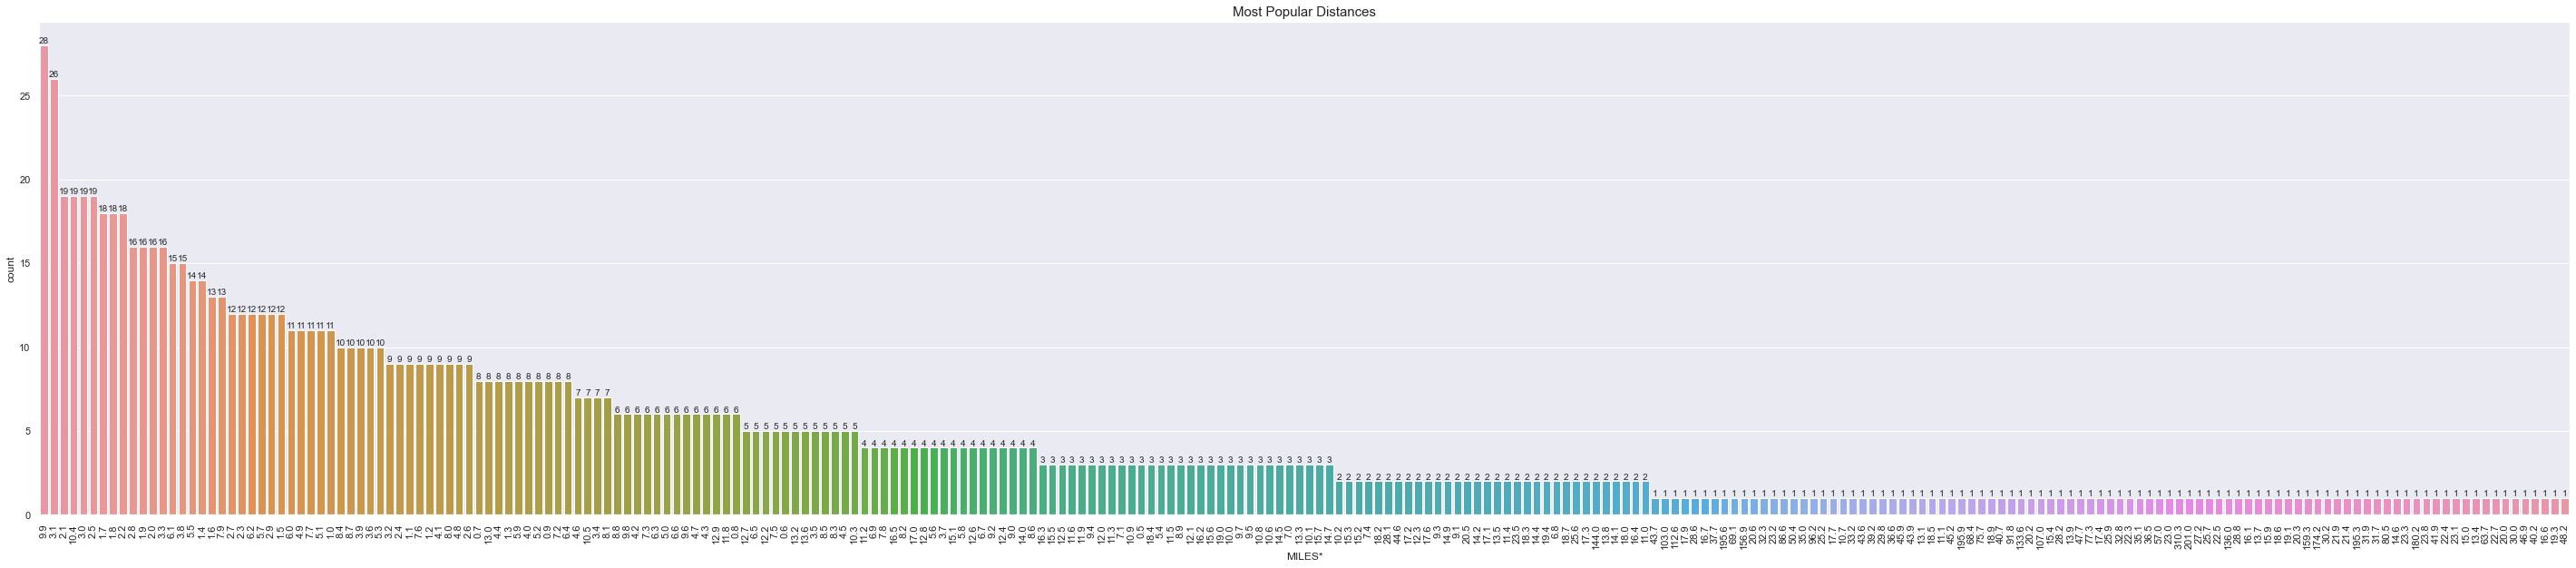

In [27]:
plt.figure(figsize=(50,10))
ax = sns.countplot(data=df, x='MILES*', order=df['MILES*'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Most Popular Distances', fontsize=15)

**Most popular distance traveled 10 miles or less**

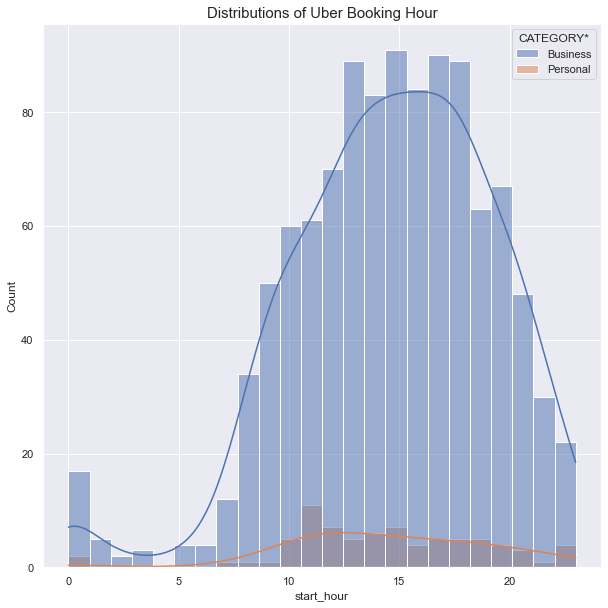

In [28]:
plt.figure(figsize=(10,10))
plt.title('Distributions of Uber Booking Hour', fontsize=15)
ax = sns.histplot(data=df, x='start_hour', kde=True, hue='CATEGORY*',bins=24)

Text(0.5, 1.0, 'Most Popular Hour to Book an Uber')

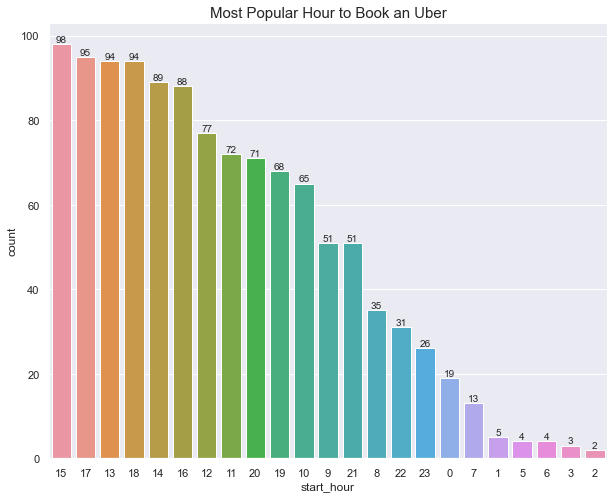

In [29]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='start_hour', order=df['start_hour'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Most Popular Hour to Book an Uber', fontsize=15)

**Hours between 1200 to 2100 are most popular**

Text(0.5, 1.0, 'Most Popular Purpose to Use an Uber')

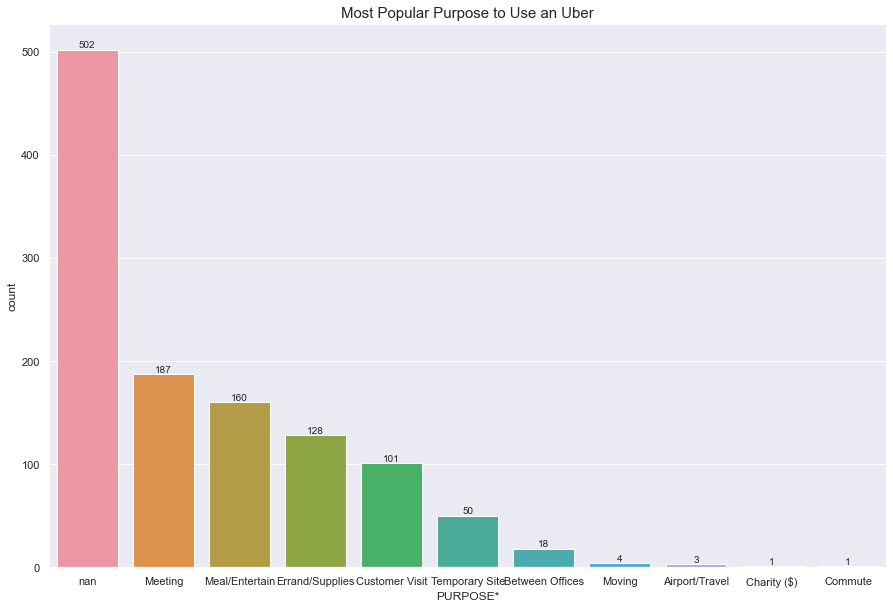

In [30]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df, x='PURPOSE*', order=df['PURPOSE*'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Most Popular Purpose to Use an Uber', fontsize=15)

**Meetings, Meals/Entertainment, Errand/Supplies, and Customer Visit are popular purposes**

Text(0.5, 1.0, 'Most Popular Week Day to Uber')

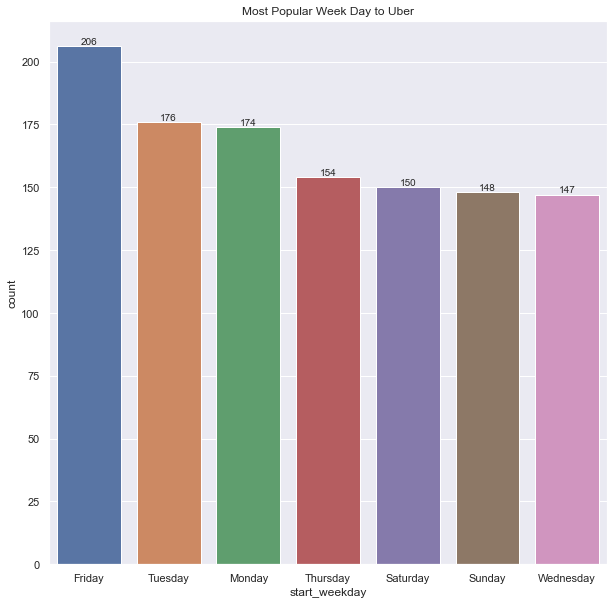

In [31]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x='start_weekday', order=df['start_weekday'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Most Popular Week Day to Uber")

**Friday is the most popular week day to book an Uber**

In [32]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'start_hour', 'start_day', 'start_DoW', 'start_month',
       'start_weekday', 'end_hour', 'end_day', 'end_DoW', 'end_month',
       'end_weekday'],
      dtype='object')

In [33]:
print(df['START_DATE*'].min())
print(df['START_DATE*'].max())

2016-01-01 21:11:00
2016-12-31 22:08:00


Text(0.5, 1.0, 'Most Popular Day of the Month')

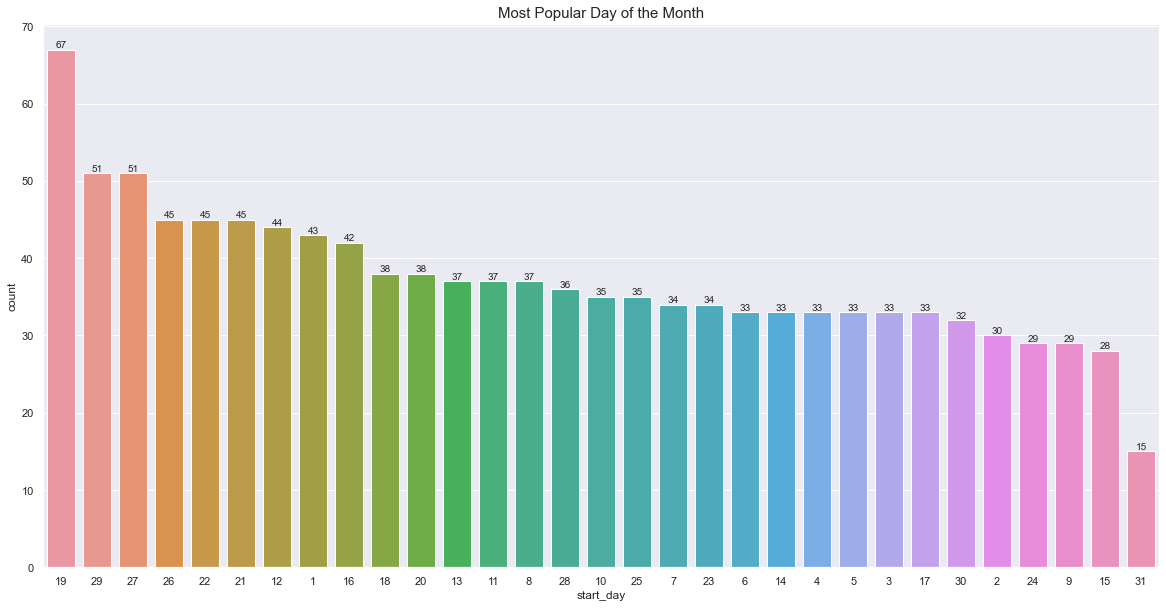

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='start_day', order=df['start_day'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Most Popular Day of the Month', fontsize=15)

**Keep in mind that four months only have 30 days in them and seven months have 31 days in them.**<br>
**Is there any correlation for what occurs on those specific days of the month?**

Text(0.5, 1.0, 'Most Popular Month to use an Uber')

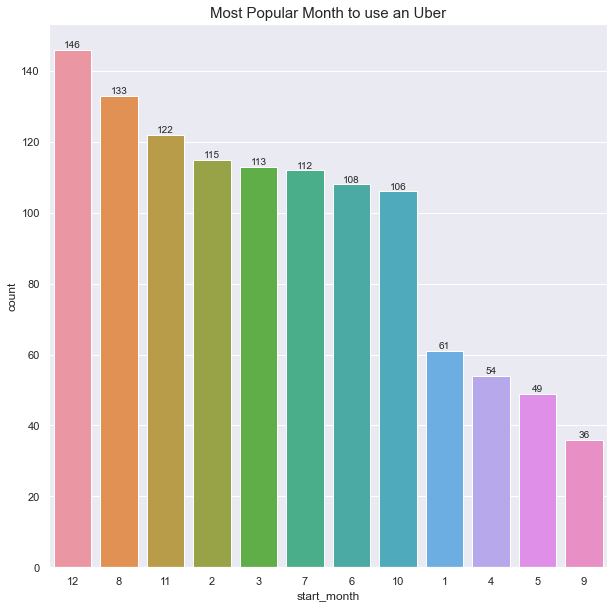

In [35]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x='start_month', order=df['start_month'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Most Popular Month to use an Uber', fontsize=15)

**December is the most popular month**<br>
**Is this due to the holidays?**

In [36]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'start_hour', 'start_day', 'start_DoW', 'start_month',
       'start_weekday', 'end_hour', 'end_day', 'end_DoW', 'end_month',
       'end_weekday'],
      dtype='object')

Text(0.5, 1.0, 'Most Popular Location to Book an Uber from')

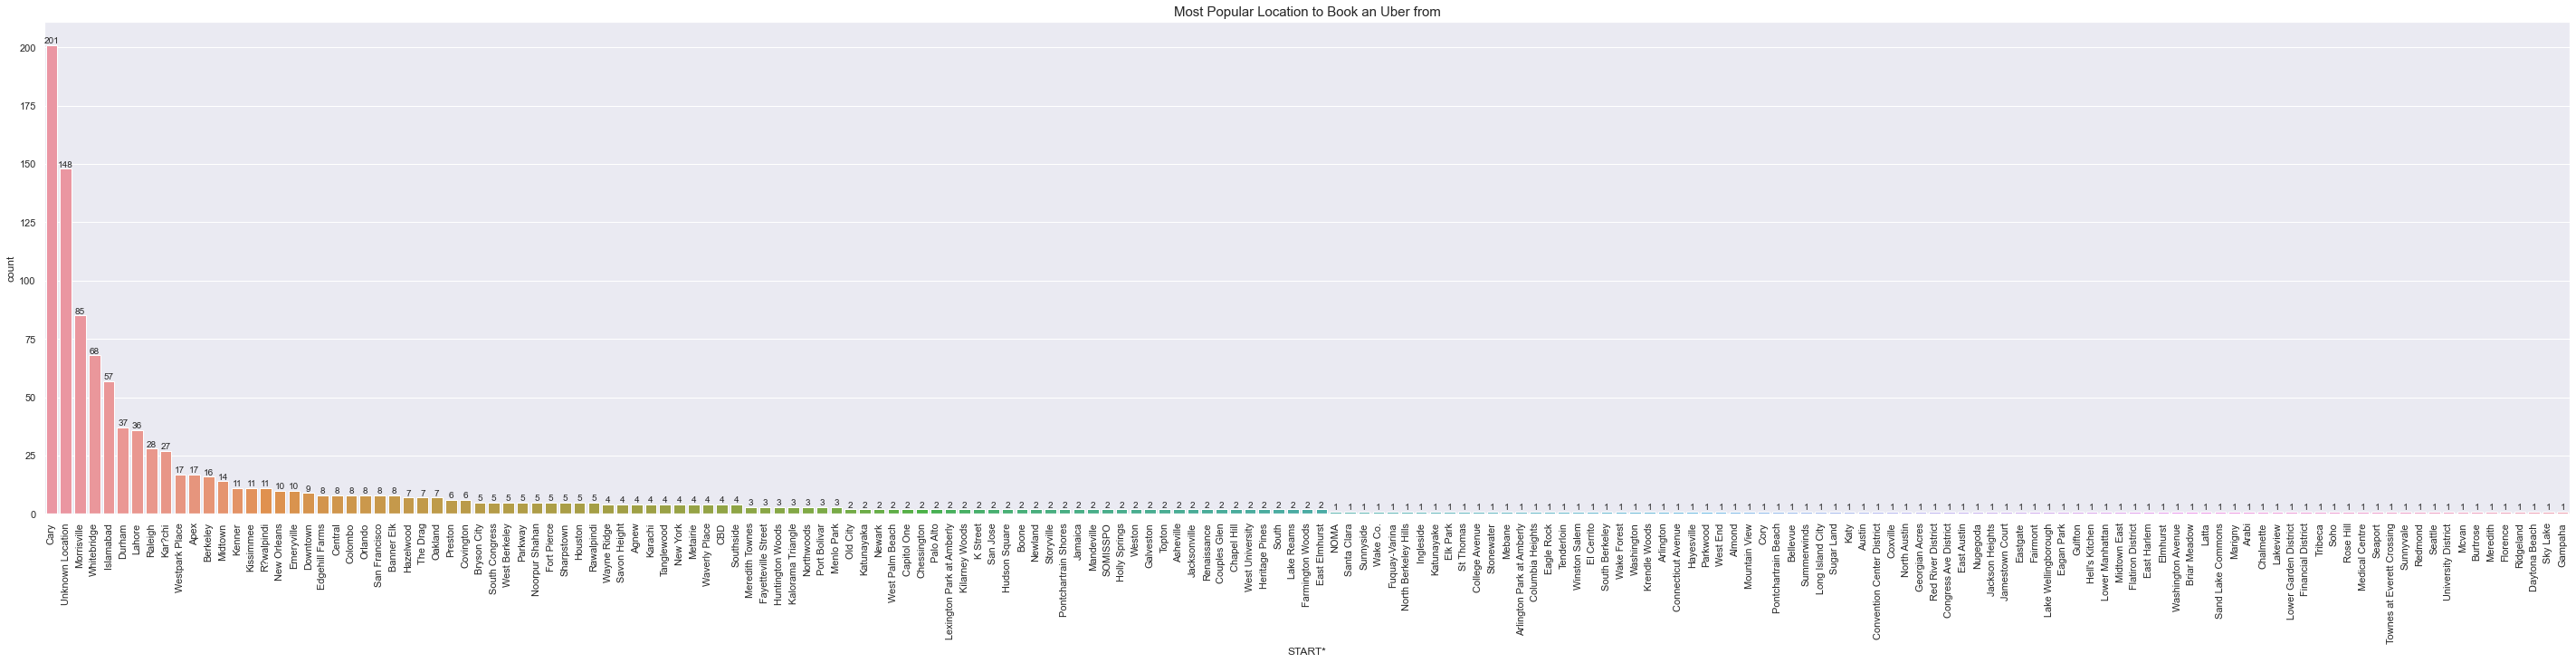

In [37]:
plt.figure(figsize=(50,10))
ax = sns.countplot(data=df, x='START*', order=df['START*'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Most Popular Location to Book an Uber from', fontsize=15)

**Cary is the most popular location to book an Uber form**